# Trabajo Final
## Estadística de la población
---

### Docente:
### Estudiantes: Tricarico Federico, Ise Daniel

## Introducción

El presente informe muestra los resultados a los que llegamos a partir del empleo de métodos estadísticos y la reflexión propia sobre la base de datos de Indec. En particular, consideramos el último período de tiempo disponible [online](https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos): el cuarto trimestre de 2021.

Sobre esa base de datos, usando herramientas de código abierto como Python, pudimos hacer diferentes análisis estadísticos. Tratamos, en particular, de seleccionar diferentes conjuntos de variables, para tratar de poner a prueba algunas hipótesis que muestran tanto las posibilidad que ofrecen las herramientas estadísticas para el tratamiento de estos problemas, así como la potencialidad que subyace en herramientas de código abierto, como son Python y sus diferentes módulos.

El trabajo emplea algunos de los procesamientos vistos en la materia recurriendo a la base de datos mencionada. Parte por la selección de las variables a considerar, se muestran sus tablas de frecuencia y se realizan algunos gráficos sobre sus resultados. Así mismo, se calculan las medidas de tendencia central pertinentes a las diferentes variables. 

Esbozando algunas hipótesis que vinculan las relaciones entre ingreso laboral por hora trabajada y la variable sexo, se trata de hacer algunos test de significación entre las dos variables, construyendo tanto una hipótesis como una hipótesis nula. Asímismo, se elabora una correlación bivariada y se aplica un análisis de regresión lineal entre las diferentes variables consideradas.

### Actividades:

* ~Elegir una base de datos~
* ~Seleccionar dos variables~
* ~~Construir tablas de frecuencia
* ~~Graficar
* Calcular medidas de tendencia central
* Aplicar test de significación entre dos variables establecidas (con hipótesis e hipótesis nula)
* Elaborar correlación bivariada
* Aplicar Regresión lineal

#### Base de datos:

https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_usu_4_Trim_2021_xls.zip

#### Variables seleccionadas:

* Ingreso laboral (P21)
* Ingreso total individual (P47T)
* Horas trabajadas (PP3E_TOT)
* Sexo (CH04)
* Edad (posible) (CH06)

#### Indicadores a construir:
Ingreso laboral según sexo
Ingreso laboral por hora trabajada
Ingreso laboral por hora trabajada según sexo
(¿Horas trabajadas según nivel de instrucción?

#### Tipos de variable: 

* Contínuas: Ingreso Laboral, Ingreso Total Individual, Horas trabajadas

* Cualitativas nominales: Sexo

Tabla de frecuencia por intervalo para las contínuas (salvo que las horas se registren discretas).
Tabla de frecuencia para sexo (quizá horas también).

Gráficos de barra para la representación gráfica de las frecuencias e interpretación. (Las contínuas invitan a hacer histogramas).

Medidas de tendencia central para ingreso. Tiene sentido dividir en deciles esta variable.

¿Qué es test de significación? ¿Cómo se calcula?

Hacer la correlación y regresión lineal.

Para iniciar el trabajo, primero hay que traer las librerías que vamos a utilizar tanto para leer los datos como para hacer el análisis. Estas librerías son: `numpy`, `pandas` y `matplotlib`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(16,6)})

Entre las diferentes funcionalidades de `pandas`, una de las más interesantes es su capacidad de leer archivos de datos en diferentes formatos. En este caso, la EPH distribuye sus datos, para algunos trimestres, en formato `xlsx`, terminación de los archivos de Excel. Para abrir este archivo, ubicado dentro de la carpeta `./data` utilizamos el siguiente comando:

In [3]:
db = pd.read_csv('./data/usu_individual_T421.csv', sep=';')
db.head()

/tmp/ipykernel_8984/2139054867.py:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  db = pd.read_csv('./data/usu_individual_T421.csv', sep=';')


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPPQHMOLPCDEGNFJ00714305,2021,4,1,4,1,44,N,17,309,...,9.0,7,33500,6,7.0,5,NaN,7.0,5,411
1,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,1,1,1,S,33,1573,...,NaN,4,32000,6,NaN,6,6.0,NaN,6,2285
2,TQRMNOQPYHKMPUCDEIJAH00663642,2021,4,1,2,1,1,S,33,1573,...,NaN,4,32000,6,NaN,6,6.0,NaN,6,2285
3,TQRMNOQYRHMOQRCDEIJAH00718661,2021,4,1,1,1,1,S,33,2635,...,NaN,12,0,12,NaN,12,12.0,NaN,12,0
4,TQRMNOPSTHMMLPCDEFMDB00713515,2021,4,1,2,1,43,N,6,87,...,7.0,7,43000,7,8.0,8,NaN,8.0,8,129


In [4]:
db.shape

(50154, 177)

En `db` tenemos, entonces, la base de datos completa. Pero no es con toda la base de datos de la EPH que vamos a trabajar. Necesitaríamos únicamenta las variables:

* Ingreso laboral (P21)
* Ingreso total individual (P47T)
* Horas trabajadas (PP3E_TOT)
* Sexo (CH04)
* Edad (posible) (CH06)

Para ello, vamos a asignar dichas variables a `df1`

In [5]:
df1 = db[['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'ESTADO',
        'P21', 'P47T', 'PP3E_TOT', 'CH04', 'CH03']]
df1 = df1[df1['ESTADO'] == 1]
df1.head()

,CODUSU,NRO_HOGAR,COMPONENTE,ESTADO,P21,P47T,PP3E_TOT,CH04,CH03
3,TQRMNOQYRHMOQRCDEIJAH00718661,1,1,1,-9,-9.0,45.0,1,1
6,TQRMNOQQSHJMKUCDEHJGH00702130,1,2,1,120000,120000.0,48.0,1,3
8,TQRMNOPPRHJLKTCDEGNFJ00678218,1,2,1,75000,75000.0,40.0,2,3
11,TQRMNOPPRHJLKTCDEGNFJ00678218,1,6,1,80000,80000.0,40.0,1,4
12,TQRMNORSTHKLKSCDEGNFJ00661706,1,1,1,45000,45000.0,40.0,2,1


Una vez delimitado el `dataframe` con el que vamos a trabajar, se procede a hacer una tabla de frecuencia del mismo, con el método `value_count()`. En este caso, lo hacemos sobre la variable Ingreso Laboral (`P21`)

In [6]:
bin_range = np.arange(0,20000000,50000) # Defino el límite inferior y superior de cada barra => [i, s)

freq = df1.P21.value_counts(sort=False,bins = bin_range).to_frame()

freq.loc[freq['P21']>0]

,P21
"(-0.001, 50000.0]",12106
"(50000.0, 100000.0]",4895
"(100000.0, 150000.0]",668
"(150000.0, 200000.0]",245
"(200000.0, 250000.0]",36
"(250000.0, 300000.0]",29
"(300000.0, 350000.0]",5
"(350000.0, 400000.0]",7
"(400000.0, 450000.0]",2
"(450000.0, 500000.0]",4


Para observar la distribución de la frecuencia de esta variable, puede ser útil graficar un histograma de frecuencia:

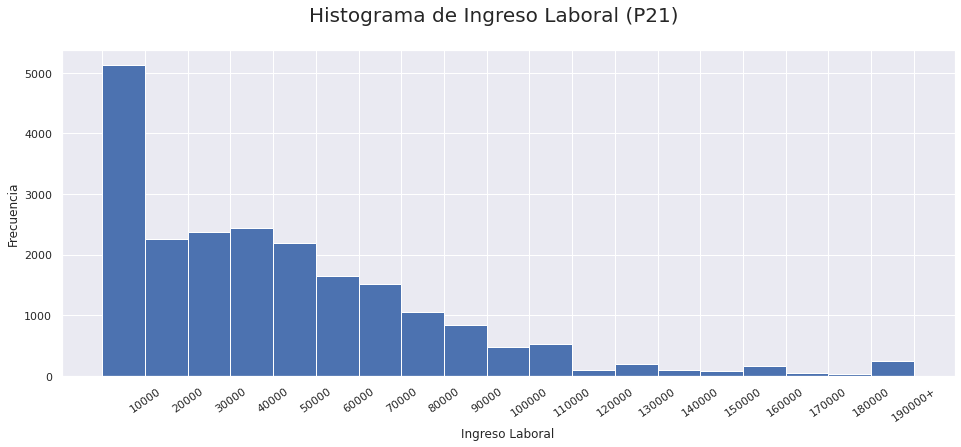

In [7]:
bin_range = np.arange(0,200000,10000) # Defino el límite inferior y superior de cada barra => [i, s)

plt.hist(np.clip(df1['P21'], bin_range[0], bin_range[-1]), bins = bin_range) 
# Le digo plt que quiero un histograma
# Con np.clip le pido que tenga de rango inferior el primer elemento de bin_range 
# y que incluya lo que está por encima del superior

plt.xlabel("Ingreso Laboral") # Defino el label del eje x
plt.ylabel("Frecuencia") # Defino el label del eje y

n_xticks = [x for x in range(0, 200000, 10000)] # creo una lista de número para definir los valores del eje x
xticks = [str(x) for x in n_xticks] # creo una lista de strings, con esos mismos números, para los labels del eje x
xticks[0] = '' # Saco el 0 por redundante
xticks[-1] = '190000+' # Cambio el último componente de la lista agregándole un +

plt.suptitle('Histograma de Ingreso Laboral (P21)', fontsize=20) # Le doy un título al plot, le asigno una fuente de 20p
plt.xticks(n_xticks, xticks, rotation=35) # Le asigno los valores creados a los labels del eje x
plt.show() # Muestro el plot